Observation 1: Of the randomly selected cities that the OpenWeatherMap API was able to get weather data for, more have latitudes between 50 degrees and 90 degrees than have latitudes between -50 degrees and -90 degrees.
Observation 2: The temperature appears to drop as the latitude approaches 90 degrees, but not as it approaches -90 degrees.
Observation 3: Distance from the equator does not have a noticeable effect on humidity, cloudiness, or windspeed.

In [208]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import random
import time
from citipy import citipy
import seaborn as sns
sns.set()

# OpenWeatherMap API Key from config
from config import api_key

In [209]:
# Randomly select 700 unique cities

# Create lists to store randomly selected latitudes, longitudes, and cities
lat = []
lng = []
cities = []

# Continue untill 700 unique cities have been selected
while len(cities) < 700:
    # Randomly select latitude and longitude
    test_lat = random.randint(-9000,9000)/100.
    test_lng = random.randint(-18000,18000)/100.
    # Use citipy to get city names
    city_data = citipy.nearest_city(test_lat, test_lng)
    city = city_data.city_name
    # Only append cities not already in the list
    if city not in cities:
        cities.append(city)
        lat.append(test_lat)
        lng.append(test_lng)

In [210]:
# Create a pandas dataframe with all desired columns
weather_df = pd.DataFrame({"latitude":lat,"longitude":lng,"city":cities})
weather_df["temperature"] = np.nan
weather_df["humidity"] = np.nan
weather_df["cloudiness"] = np.nan
weather_df["wind speed"] = np.nan

In [211]:
# Use the openweathermap api

# Counter
row_count = 0

# Loop through the cities and get the weather information
for index, row in weather_df.iterrows():
    
    # Create endpoint URL
    query_url = "http://api.openweathermap.org/data/2.5/weather?appid=%s&q=%s&units=imperial" % (api_key, row["city"])
    # Remove the api key from the URL that prints to log
    print_url = "http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=%s&units=imperial" % row["city"]
    
    # Print log to ensure the loop is working correctly
    print(f"Now retrieving city # {row_count}, {row['city']}")
    print(print_url)
    row_count += 1
    
    # Grab JSON at the openweathermap api
    weather_response = requests.get(query_url).json()
    # Use try/except to skip any cities with weather errors
    try:
        test_temp = weather_response["main"]["temp_max"]
        test_humidity = weather_response["main"]["humidity"]
        test_wind = weather_response["wind"]["speed"]
        test_clouds = weather_response["clouds"]["all"]
        weather_df.set_value(index,"temperature", test_temp)
        weather_df.set_value(index,"humidity", test_humidity)
        weather_df.set_value(index,"cloudiness", test_clouds)
        weather_df.set_value(index,"wind speed", test_wind)
    except:
        print("Error with city weather data. Skipping")
        continue
    # Half second time delay between api hits
    time.sleep(0.5)
    

Now retrieving city # 0, bow island
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=bow island&units=imperial
Now retrieving city # 1, bethel
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=bethel&units=imperial
Now retrieving city # 2, bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=bengkulu&units=imperial
Error with city weather data. Skipping
Now retrieving city # 3, east london
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=east london&units=imperial
Now retrieving city # 4, fort nelson
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=fort nelson&units=imperial
Now retrieving city # 5, chuy
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=chuy&units=imperial
Now retrieving city # 6, anicuns
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=anicuns&units=imperial
Now retrieving city # 7, jamestown
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=jamestown&unit

Now retrieving city # 66, barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=barentsburg&units=imperial
Error with city weather data. Skipping
Now retrieving city # 67, kindu
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=kindu&units=imperial
Now retrieving city # 68, daru
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=daru&units=imperial
Now retrieving city # 69, laguna
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=laguna&units=imperial
Now retrieving city # 70, santa clara
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=santa clara&units=imperial
Now retrieving city # 71, port hardy
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=port hardy&units=imperial
Now retrieving city # 72, tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=tuatapere&units=imperial
Now retrieving city # 73, santiago del estero
http://api.openweathermap.org/data/2.5/weather?appid=api_key&

Now retrieving city # 131, leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=leningradskiy&units=imperial
Now retrieving city # 132, belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=belushya guba&units=imperial
Error with city weather data. Skipping
Now retrieving city # 133, saldanha
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=saldanha&units=imperial
Now retrieving city # 134, alice springs
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=alice springs&units=imperial
Now retrieving city # 135, roma
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=roma&units=imperial
Now retrieving city # 136, kestel
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=kestel&units=imperial
Now retrieving city # 137, espinosa
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=espinosa&units=imperial
Now retrieving city # 138, atar
http://api.openweathermap.org/data/2.5/weather?app

Now retrieving city # 197, kano
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=kano&units=imperial
Now retrieving city # 198, ust-kulom
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=ust-kulom&units=imperial
Now retrieving city # 199, wladyslawowo
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=wladyslawowo&units=imperial
Now retrieving city # 200, boffa
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=boffa&units=imperial
Now retrieving city # 201, puerto ayacucho
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=puerto ayacucho&units=imperial
Now retrieving city # 202, taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=taolanaro&units=imperial
Error with city weather data. Skipping
Now retrieving city # 203, brae
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=brae&units=imperial
Now retrieving city # 204, ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=a

Now retrieving city # 261, havelock
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=havelock&units=imperial
Now retrieving city # 262, mansion
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=mansion&units=imperial
Error with city weather data. Skipping
Now retrieving city # 263, coihaique
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=coihaique&units=imperial
Now retrieving city # 264, hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=hithadhoo&units=imperial
Now retrieving city # 265, pietersburg
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=pietersburg&units=imperial
Error with city weather data. Skipping
Now retrieving city # 266, nadadores
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=nadadores&units=imperial
Now retrieving city # 267, wangqing
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=wangqing&units=imperial
Now retrieving city # 268, muroto
http://api.openwe

Error with city weather data. Skipping
Now retrieving city # 327, akola
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=akola&units=imperial
Now retrieving city # 328, port blair
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=port blair&units=imperial
Now retrieving city # 329, westport
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=westport&units=imperial
Now retrieving city # 330, victor harbor
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=victor harbor&units=imperial
Now retrieving city # 331, usinsk
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=usinsk&units=imperial
Now retrieving city # 332, berdigestyakh
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=berdigestyakh&units=imperial
Now retrieving city # 333, shinjo
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=shinjo&units=imperial
Now retrieving city # 334, abashiri
http://api.openweathermap.org/data/2.5/weather?appid=a

Now retrieving city # 392, winchester
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=winchester&units=imperial
Now retrieving city # 393, kalmunai
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=kalmunai&units=imperial
Now retrieving city # 394, bellevue
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=bellevue&units=imperial
Now retrieving city # 395, esperance
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=esperance&units=imperial
Now retrieving city # 396, nelson bay
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=nelson bay&units=imperial
Now retrieving city # 397, tutoia
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=tutoia&units=imperial
Now retrieving city # 398, gayny
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=gayny&units=imperial
Now retrieving city # 399, miramar
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=miramar&units=imperial
Now retrieving cit

Error with city weather data. Skipping
Now retrieving city # 458, tunxi
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=tunxi&units=imperial
Error with city weather data. Skipping
Now retrieving city # 459, naze
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=naze&units=imperial
Now retrieving city # 460, kharitonovo
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=kharitonovo&units=imperial
Now retrieving city # 461, guozhen
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=guozhen&units=imperial
Now retrieving city # 462, kavieng
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=kavieng&units=imperial
Now retrieving city # 463, labrea
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=labrea&units=imperial
Error with city weather data. Skipping
Now retrieving city # 464, alpinopolis
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=alpinopolis&units=imperial
Now retrieving city # 465, taoud

Now retrieving city # 522, lima
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=lima&units=imperial
Now retrieving city # 523, belaya gora
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=belaya gora&units=imperial
Now retrieving city # 524, japura
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=japura&units=imperial
Now retrieving city # 525, mopipi
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=mopipi&units=imperial
Now retrieving city # 526, barra patuca
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=barra patuca&units=imperial
Now retrieving city # 527, bull savanna
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=bull savanna&units=imperial
Now retrieving city # 528, mathbaria
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=mathbaria&units=imperial
Now retrieving city # 529, kananga
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=kananga&units=imperial
Now retrie

Now retrieving city # 587, alyangula
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=alyangula&units=imperial
Now retrieving city # 588, kinshasa
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=kinshasa&units=imperial
Now retrieving city # 589, kem
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=kem&units=imperial
Now retrieving city # 590, listvyanka
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=listvyanka&units=imperial
Now retrieving city # 591, havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=havre-saint-pierre&units=imperial
Now retrieving city # 592, subate
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=subate&units=imperial
Now retrieving city # 593, geraldton
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=geraldton&units=imperial
Now retrieving city # 594, fernandopolis
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=fernandopolis&units=i

Now retrieving city # 652, ballangen
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=ballangen&units=imperial
Now retrieving city # 653, kiunga
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=kiunga&units=imperial
Now retrieving city # 654, panjab
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=panjab&units=imperial
Now retrieving city # 655, san vicente
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=san vicente&units=imperial
Now retrieving city # 656, pecos
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=pecos&units=imperial
Now retrieving city # 657, muscat
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=muscat&units=imperial
Now retrieving city # 658, eyl
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=eyl&units=imperial
Now retrieving city # 659, flinders
http://api.openweathermap.org/data/2.5/weather?appid=api_key&q=flinders&units=imperial
Now retrieving city # 660, ginir
htt

In [212]:
# Save dataframe as a csv
weather_df.to_csv("output_weather_data.csv")

In [219]:
# Remove rows with missing weather data
clean_weather_df = weather_df.dropna(axis=0,how="any")

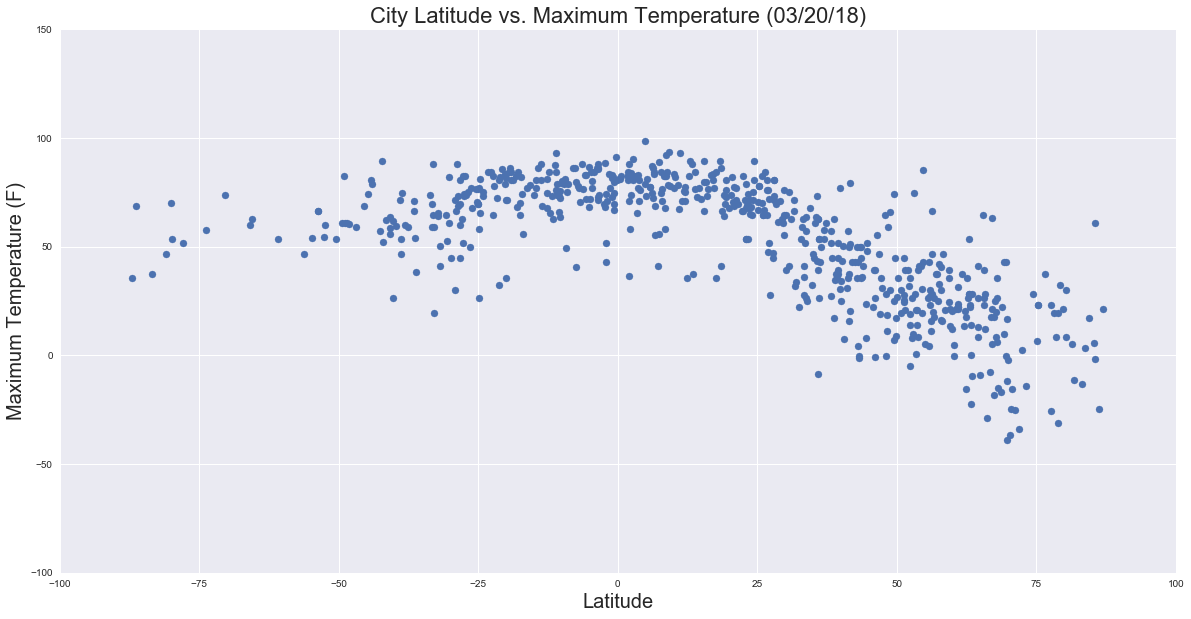

In [214]:
# Latitude vs Temperature Plot
plt.figure(figsize=(20,10))
plt.scatter(clean_weather_df["latitude"],clean_weather_df["temperature"], marker="o")
plt.xlabel("Latitude",fontsize=20)
plt.ylabel("Maximum Temperature (F)",fontsize=20)
plt.title("City Latitude vs. Maximum Temperature (03/20/18)",fontsize=22)
plt.xlim([-100,100])
plt.ylim([-100,150])
plt.grid(True)

# Save the figure
plt.savefig("output_latitude_vs_temperature.png")

plt.show()

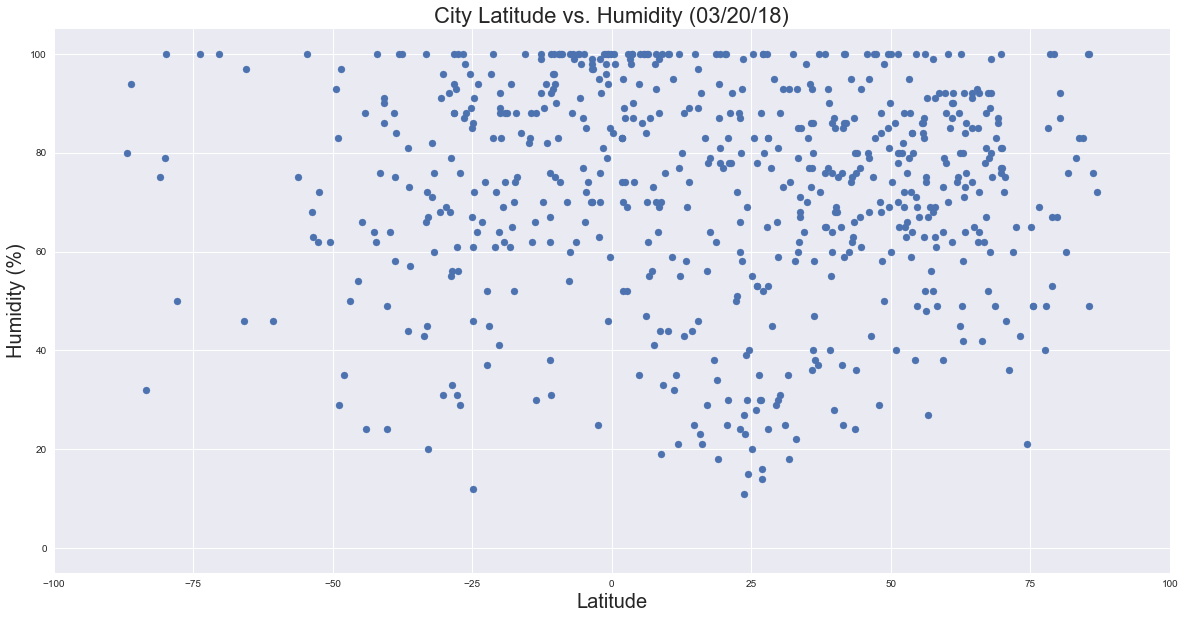

In [215]:
# Latitude vs Humidity Plot
plt.figure(figsize=(20,10))
plt.scatter(clean_weather_df["latitude"],clean_weather_df["humidity"],marker="o")
plt.xlabel("Latitude",fontsize=20)
plt.ylabel("Humidity (%)",fontsize=20)
plt.title("City Latitude vs. Humidity (03/20/18)",fontsize=22)
plt.xlim([-100,100])
plt.ylim([-5,105])
plt.grid(True)

# Save the figure
plt.savefig("output_latitude_vs_humidity.png")

plt.show()

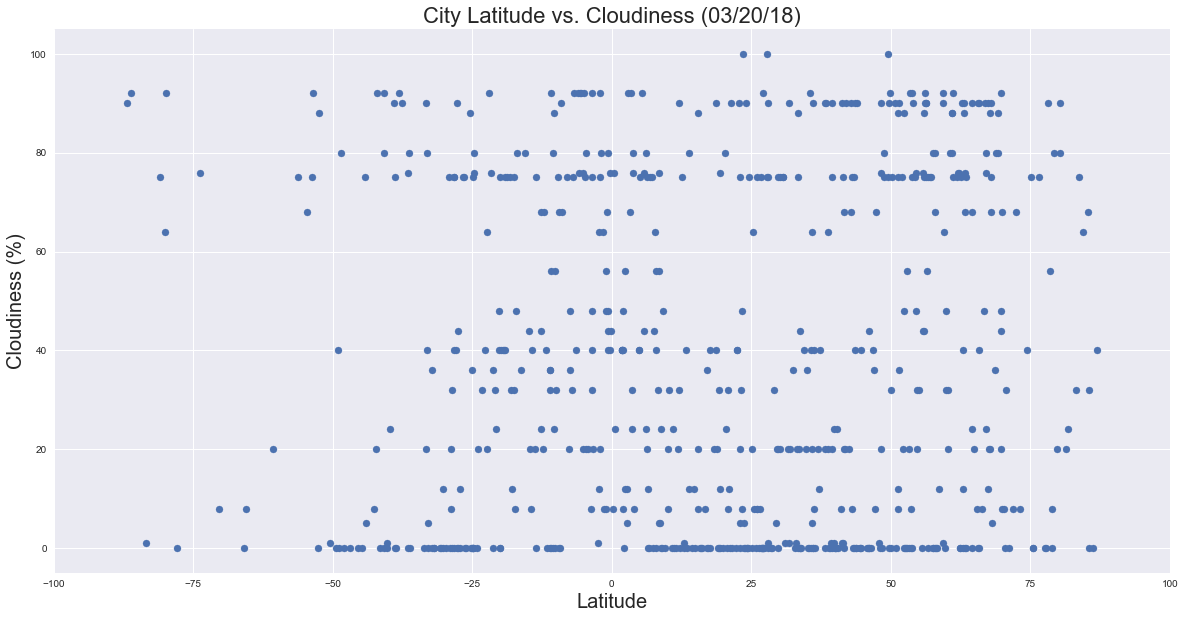

In [216]:
# Latitude vs Cloudiness Plot
plt.figure(figsize=(20,10))
plt.scatter(clean_weather_df["latitude"],clean_weather_df["cloudiness"],marker="o")
plt.xlabel("Latitude",fontsize=20)
plt.ylabel("Cloudiness (%)",fontsize=20)
plt.title("City Latitude vs. Cloudiness (03/20/18)",fontsize=22)
plt.xlim([-100,100])
plt.ylim([-5,105])
plt.grid(True)

# Save the figure
plt.savefig("output_latitude_vs_cloudiness.png")

plt.show()

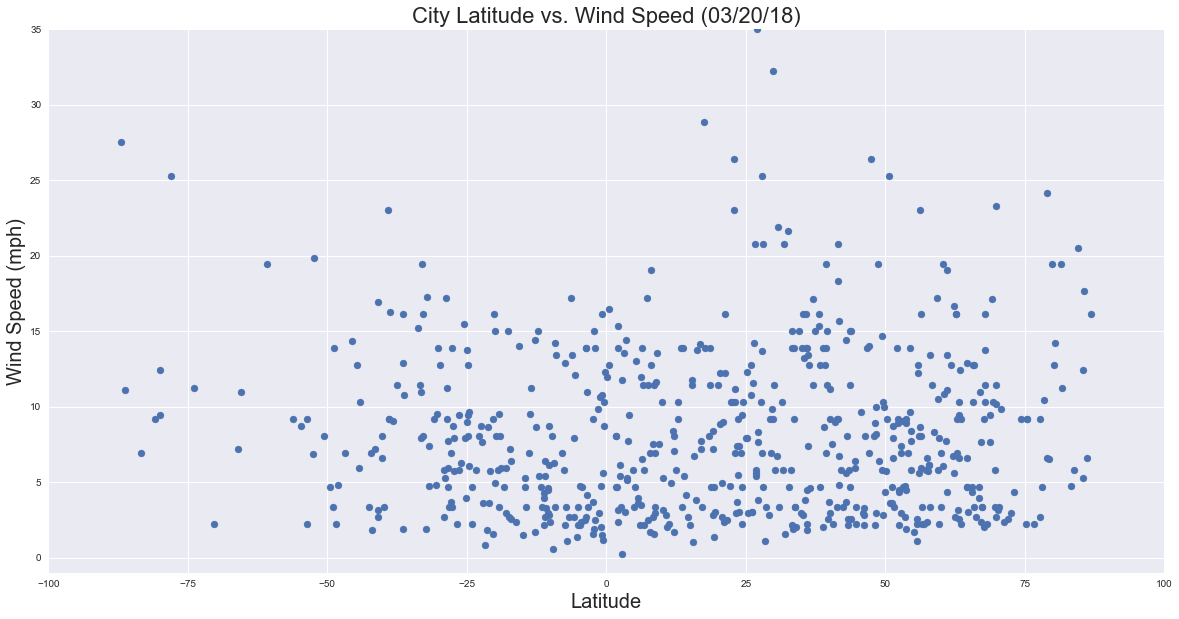

In [218]:
# Latitude vs. Wind Speed Plot
plt.figure(figsize=(20,10))
plt.scatter(clean_weather_df["latitude"],clean_weather_df["wind speed"],marker="o")
plt.xlabel("Latitude",fontsize=20)
plt.ylabel("Wind Speed (mph)",fontsize=20)
plt.title("City Latitude vs. Wind Speed (03/20/18)",fontsize=22)
plt.xlim([-100,100])
plt.ylim([-1,35])
plt.grid(True)

# Save the figure
plt.savefig("output_latitude_vs_windspeed.png")

plt.show()